In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sci

In [2]:
#Исходные данные согласно 9 варианту
n = 80
mu, sigma = -4, 16 
q = 0,75

In [3]:
## 1.1
data = np.random.normal(mu, sigma, n)
print(data)
a_estimate=np.mean(data)
sigma_estimate=np.std(data,ddof=1)
(a_estimate,sigma_estimate)
print(a_estimate)

[ 12.55614081   6.80562033   1.34533516  -9.61336695  17.85878494
  17.31009719  20.44811958 -26.24308431 -17.05700302 -25.56562488
   1.00808569 -24.08610956   7.8387391   -2.79654186 -18.49441201
   3.19422671 -21.69301505 -26.06445319  -9.81226586 -25.91664214
  -6.94360532 -10.92314833 -28.84173073 -26.47503767  20.03489711
  -0.93914874  11.68199688  -7.55419885  -4.23986794   3.35211171
  -1.76527205 -55.64830901  -4.87355547 -13.32391049  -5.7765136
  21.35673595  -0.74044516  -1.98183893   5.16531098 -20.63856021
   9.4492443    0.82512092 -20.0461962  -12.86169548 -26.30919129
 -12.56672419  26.48151439   0.93967224 -12.42923804 -29.00177636
  -8.73471748 -27.69754367 -40.41992058 -29.24788817   0.6467214
  -1.76313955 -12.86952434  21.46643454  14.39101952 -22.8667202
  -6.0165394   -5.69433183   3.29566911 -17.4877997   -1.577468
  30.12906038   6.80273933  -3.65677059 -15.5428238   -6.32258172
   8.30431773  -0.36475865  -1.5853947  -18.31422058   0.80957156
   3.62314319  

In [4]:
# Формула Фридмана Диакониса
import numpy as np

q75, q25 = np.percentile(data, [75, 25])
iqr = q75 - q25
n = len(data)
h = (2 * iqr) / (n ** (1/3))
print(f'{h:.5f}')

k_bins = round((data.max()-data.min())/h)
print(k_bins)

9.78344
9


In [5]:
## 1.2
count, bin_edges = np.histogram(data, k_bins)

print(count)
print(bin_edges)
sum(count)

[ 1  1  4 13 13 24 11  8  5]
[-55.64830901 -46.11749019 -36.58667137 -27.05585255 -17.52503373
  -7.99421491   1.53660391  11.06742273  20.59824155  30.12906038]


80

0.10492277933772465
1.0000000000000002


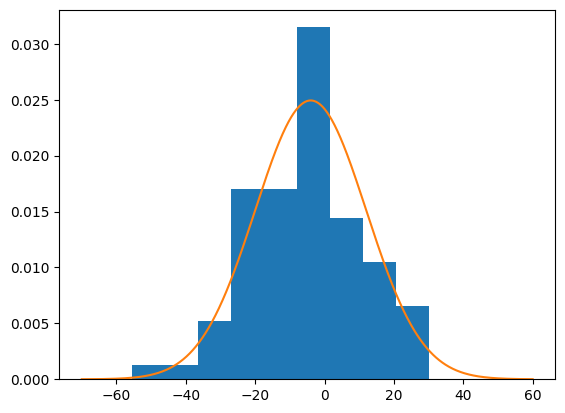

In [6]:
#2.2
from scipy.stats import norm

count, bins, ignored = plt.hist(data, k_bins, density=True)

x = np.linspace(-70, 60, 1000)
pdf = norm.pdf(x, mu, sigma)

plt.plot(x, pdf, label = 'fff')

print(sum(count))
print(sum(count*(bin_edges[1]-bin_edges[0])))

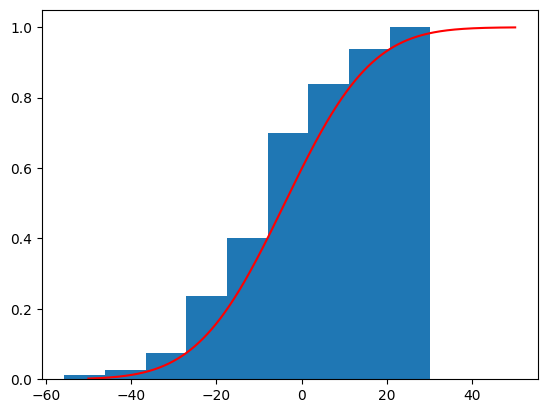

In [7]:
## 2.3
from scipy.stats import norm

count, bins, ignored  = plt.hist(data, k_bins, density=True, cumulative=True)

x = np.linspace(-50, 50, 1000)
cdf = norm.cdf(x, mu, sigma)
plt.plot(x, cdf, label='CDF', color='red')

Axes(0.125,0.11;0.775x0.77)
Выбросы: [-55.64830901]


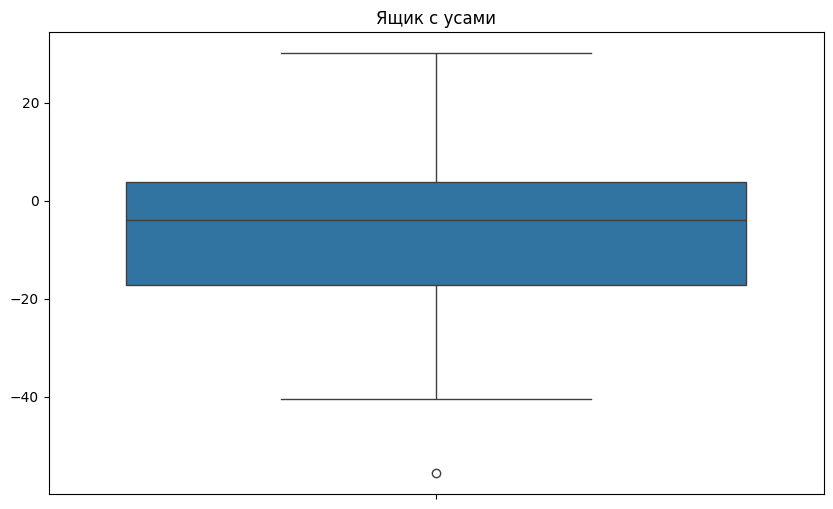

In [8]:
## 2.4
import seaborn as sb

plt.figure(figsize=(10, 6))
W=sb.boxplot(data)
print(W)

plt.title("Ящик с усами")

q1, q3 = np.percentile(data, [25, 75])
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = data[(data < lower_bound) | (data > upper_bound)]
print("Выбросы:", outliers)

In [9]:
import numpy as np
from scipy.stats import norm

mu = -4
sigma = 4
q = 0.75

## 3.1
lower_bound = mu - q * sigma
upper_bound = mu + q * sigma

probability = norm.cdf(upper_bound, mu, sigma) - norm.cdf(lower_bound, mu, sigma)
print(f'Теоретическая вероятность: {probability:.5f}')


Теоретическая вероятность: 0.54675


In [10]:
## 3.2
sample = np.random.normal(mu, sigma, n)

relative_frequency = np.mean(np.abs(sample - mu) < q * sigma)
print(f'Оцененная вероятность на выборке: {relative_frequency:.5f}')

Оцененная вероятность на выборке: 0.63750


In [11]:
## 3.3
n_large = n * 50
large_sample = np.random.normal(mu, sigma, n_large)

relative_frequency_large = np.mean(np.abs(large_sample - mu) < q * sigma)
print(f'Оцененная вероятность на большой выборке: {relative_frequency_large:.5f}')

Оцененная вероятность на большой выборке: 0.53800


In [12]:
import numpy as np
from scipy.stats import describe

n = 80
mu = -4
sigma = 4

sample = np.random.normal(mu, sigma, n)

## 4.1 
mean_sample = np.mean(sample)
median_sample = np.median(sample)
var_sample = np.var(sample, ddof=1)
std_sample = np.std(sample, ddof=1)

# Вычисление асимметрии и эксцесса
skewness_sample = (n / ((n - 1) * (n - 2))) * np.sum(((sample - mean_sample) / std_sample) ** 3)
kurtosis_sample = (n * (n + 1) / ((n - 1) * (n - 2) * (n - 3))) * np.sum(((sample - mean_sample) / std_sample) ** 4) - (3 * (n - 1) ** 2 / ((n - 2) * (n - 3)))

print(f"Оценки по формулам:\nМатематическое ожидание: {mean_sample:.5f}\n"
      f"Дисперсия: {var_sample:.5f}\nСтандартное отклонение: {std_sample:.5f}\n"
      f"Медиана: {median_sample:.5f}\nАсимметрия: {skewness_sample:.5f}\nЭксцесс: {kurtosis_sample:.5f}")


Оценки по формулам:
Математическое ожидание: -3.15804
Дисперсия: 20.44600
Стандартное отклонение: 4.52173
Медиана: -2.92214
Асимметрия: -0.38496
Эксцесс: -0.48404


In [13]:
## 4.2 
descr = describe(sample)
mean_func = descr.mean
var_func = descr.variance
std_func = np.sqrt(var_func)
skewness_func = descr.skewness
kurtosis_func = descr.kurtosis

print(f"Оценки с использованием функций:\nМатематическое ожидание: {mean_func:.5f}\n"
      f"Дисперсия: {var_func:.5f}\nСтандартное отклонение: {std_func:.5f}\n"
      f"Медиана: {median_sample:.5f}\nАсимметрия: {skewness_func:.5f}\nЭксцесс: {kurtosis_func:.5f}")

Оценки по формулам:
Математическое ожидание: -3.15804
Дисперсия: 20.44600
Стандартное отклонение: 4.52173
Медиана: -2.92214
Асимметрия: -0.37770
Эксцесс: -0.52839


In [14]:
## 4.3
large_sample = np.random.normal(mu, sigma, n * 50)
descr_large = describe(large_sample)
median_large = np.median(sample)

mean_large = descr_large.mean
var_large = descr_large.variance
std_large = np.sqrt(var_large)
skewness_large = descr_large.skewness
kurtosis_large = descr_large.kurtosis

print(f"Оценки для увеличенной выборки (50*n):\nМатематическое ожидание: {mean_large:.5f}\n"
      f"Дисперсия: {var_large:.5f}\nСтандартное отклонение: {std_large:.5f}\n"
      f"Медиана: {median_large:.5f}\nАсимметрия: {skewness_large:.5f}\nЭксцесс: {kurtosis_large:.5f}")


Оценки по формулам:
Математическое ожидание: -4.08167
Дисперсия: 16.27811
Стандартное отклонение: 4.03461
Медиана: -2.92214
Асимметрия: 0.04006
Эксцесс: 0.06515
